# Medicotask - resnet50

# Medicodataset 70-30

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

In [3]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
PATH = "../../../data/data_generated_medicotask_70_30_v2/"
sz= 64 #64 # changed to 64 - 64X64 is good for satalite image analysis, Why? to study
arch=resnet50
bs=64

In [6]:
os.listdir(PATH)

['test',
 'keras_history',
 'pytorch_plots',
 'pytorch_gpu_info',
 'validation',
 'keras_plots',
 'pytorch_models',
 'mxnet_models',
 'keras_gpu_info',
 'tmp',
 'mxnet_history',
 'models',
 'pytorch_history',
 'mxnet_plots',
 'keras_models',
 'train']

In [7]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4, val_name='validation')
learn = ConvLearner.pretrained(arch, data)

/home/vajira/.local/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
/home/vajira/.local/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [ ]:
lrf=learn.lr_find()
learn.sched.plot()

In [8]:
lr = 0.2

In [ ]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

In [ ]:
learn.sched.plot_loss()

In [9]:
lrs = np.array([lr/9,lr/3,lr])

In [ ]:
learn.unfreeze()
learn.fit(lrs, 4, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save('7_1_fastai_resnet50_medico_15_classes_v2')

In [ ]:
learn.sched.plot_loss()

In [ ]:
sz=128

In [ ]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4,val_name='validation')

In [ ]:
learn.set_data(data)
learn.freeze()
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 4, cycle_len=1, cycle_mult=2)


In [ ]:
learn.save('7_1_fastai_resnet50_medico_15_classes_v2_2')

In [ ]:
learn.load('7_1_fastai_resnet50_medico_15_classes_v2_2')

In [10]:
sz=256
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4,val_name='validation')

In [ ]:
learn.set_data(data)
learn.freeze()
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save('7_1_fastai_resnet50_medico_15_classes_v2_3')

In [11]:
learn.load('7_1_fastai_resnet50_medico_15_classes_v2_3')

In [12]:
learn.unfreeze()
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2) # changed 4 to 5 (epochs)
learn.save('7_1_fastai_resnet50_medico_15_classes_v2_last')

epoch      trn_loss   val_loss   accuracy                  
    0      0.51698    0.399109   0.842105  
    1      0.548637   0.419728   0.843985                  
    2      0.401301   0.323237   0.875313                  
    3      0.443233   0.80198    0.780702                  
    4      0.436015   0.407714   0.847744                  
    5      0.3555     0.332186   0.869048                  
    6      0.291771   0.322578   0.872807                  
    7      0.390325   0.457981   0.818296                  
    8      0.413051   0.393825   0.850877                  
    9      0.391601   0.41827    0.853383                  
    10     0.332357   0.423278   0.852757                  
    11     0.283682   0.359881   0.858396                  
    12     0.22534    0.331361   0.87594                   
    13     0.199888   0.331239   0.87406                   
    14     0.182793   0.324547   0.879073                  
    15     0.29808    0.554778   0.802632               

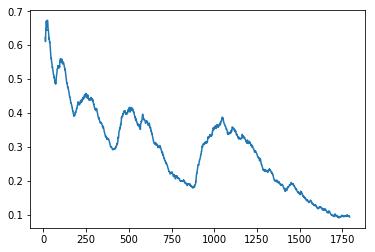

In [13]:
learn.sched.plot_loss()

In [14]:
learn.sched.epoch

31

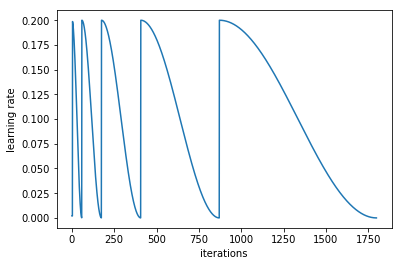

In [15]:
learn.sched.plot_lr()

In [18]:
learn.sched.

[0.3991087515252575,
 0.41972789399904714,
 0.32323653745770753,
 0.8019804672191018,
 0.407713514521606,
 0.33218583479561004,
 0.3225780567877872,
 0.45798081562931375,
 0.39382478064462956,
 0.41826950465527396,
 0.4232776683374754,
 0.3598814248889311,
 0.3313605054876858,
 0.3312385127807321,
 0.32454668138559,
 0.5547777176799631,
 0.526603851402015,
 0.8286847393016767,
 0.512907270052678,
 0.5968428732159742,
 0.39719456329680325,
 0.40013721503111954,
 0.47102782892105277,
 0.36265290246571513,
 0.3848451777060229,
 0.3612416692843712,
 0.3590530445402427,
 0.36065942101311266,
 0.35478447657778744,
 0.35709080585561004,
 0.3561532838003976]

In [ ]:
learn.load('7_1_fastai_resnet50_medico_15_classes_v2_last')

In [19]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [20]:
accuracy_np(probs, y)

0.8872180451127819

In [ ]:
learn.unfreeze()
learn.fit(lrs, 4, cycle_len=1, cycle_mult=2)
learn.save('7_1_fastai_resnet50_medico_15_classes_v2_last_2')

## Analyzing results

### Confusion matrix 

In [21]:
preds = np.argmax(probs, axis=1)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [23]:
plt.rcParams['figure.figsize'] = [15, 10]

[[ 52   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 114  22   0   1   0   0   0   0   0   0   0   0   1   0]
 [  0   0  17 108   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0  33   0   0   0   0   0   0   1]
 [  0   0   0   1   1   6   0   0   0   0   2   0   1   0   0   0]
 [  0   0   0   0   0   0 115   0   0   0   6   0   0   0   0   4]
 [  0   0   0   0   0   0   0 131   0   0   1   0   0   0   0   0]
 [  0   0   0   0  32   0   0   3  97   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   1   0   0   1   9   3   0   0 159   0   0   0   0  11]
 [  0   0   1   0   0   0   0   0   0   0   3  65   1   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   1 119   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  39   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 110 

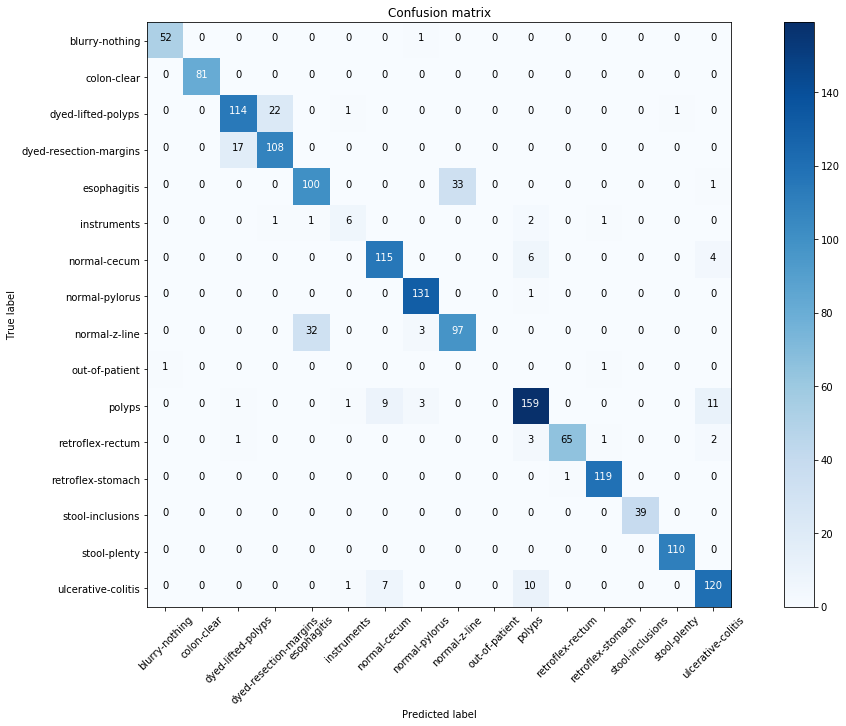

In [24]:
plot_confusion_matrix(cm, data.classes)

In [30]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, val_name='validation', num_workers=4)

In [31]:
log_preds_t,y_t = learn.TTA()

In [33]:
probs_t = np.mean(np.exp(log_preds_t),0)
accuracy_np(probs_t, y_t)

0.8916040100250626

[[ 52   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 113  23   0   1   0   0   0   0   0   0   0   0   1   0]
 [  0   0  17 108   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 101   0   0   0  32   0   0   0   0   0   0   1]
 [  0   0   0   1   1   6   0   0   0   0   1   0   1   0   0   1]
 [  0   0   0   0   0   0 116   0   0   0   5   0   0   0   0   4]
 [  0   0   0   0   0   0   0 131   0   0   1   0   0   0   0   0]
 [  0   0   0   0  28   0   0   2 102   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   2   0   0   0   1   8   3   0   0 159   0   0   0   0  11]
 [  0   0   1   0   0   0   0   0   0   0   2  69   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1 119   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  39   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 110 

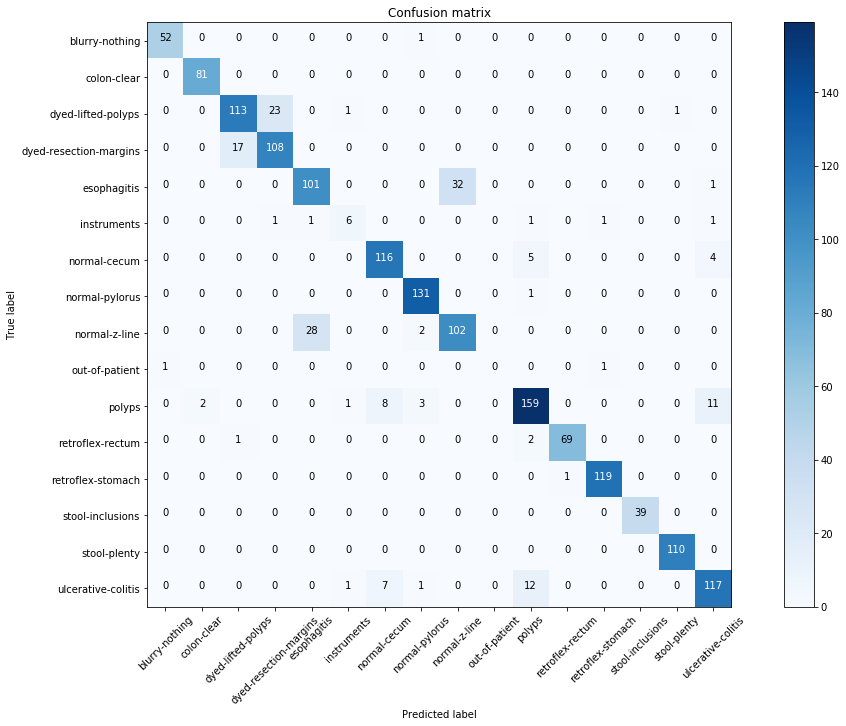

In [34]:
preds_t = np.argmax(probs_t, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_t, preds_t)
plot_confusion_matrix(cm, data.classes)